In [1]:
#import necessary python libraries
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import math
from JSON_to_DF import JSON_to_DataFrame
from Lightcurve_class import *
%matplotlib inline

In [3]:
#Load data into a pandas dataframe for easier manipulation
df = JSON_to_DataFrame("../../../OSC_data/JSON_data/SN2011fe.json")

#Pick out the I band portion of data 
I_data = df[df.band == 'I']

#Create instance of Lightcurve class passing data as magnitude
data = filter_lightcurve(I_data.time.values, I_data.magnitude.values, I_data.e_magnitude.values, 'I', 'mag')



/Users/ethanmarx/anaconda/envs/NUREU17/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['band', 'source', 'telescope']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


TypeError: __init__() missing 1 required positional argument: 'path'

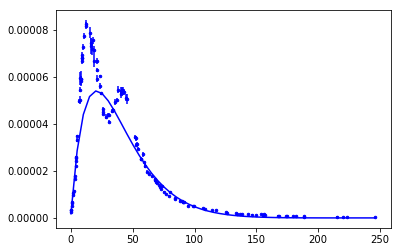

20.0501435443


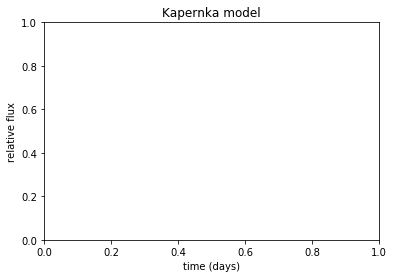

In [3]:
#Fit data to Kapernka model and return RMSE
print(data.Kapernka_fit_plot())
plt.xlabel('time (days)')
plt.ylabel('relative flux')
plt.title('Kapernka model')

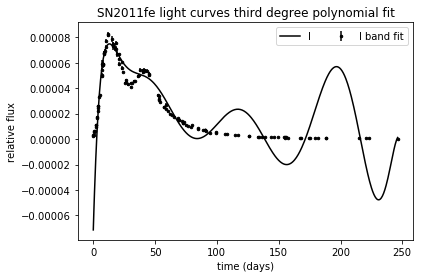

767.363686656


In [4]:
#Fit data to polynomial function of any degree 
plt.close()
print(data.polynomial_fit_plot(10))


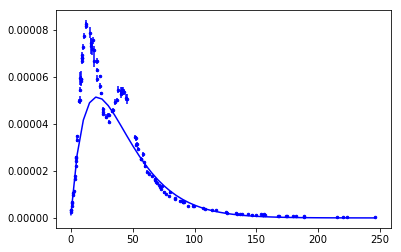

19.6523518991


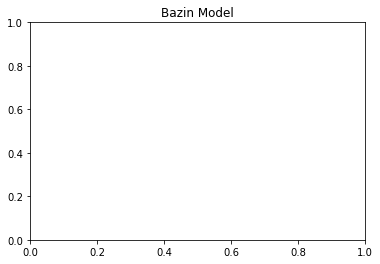

In [5]:
plt.close()
print(data.Bazin_fit_plot())
plt.title('Bazin Model')


In [5]:
temp =df[['band', 'source']]


In [6]:
pairs = []
for row in temp.iterrows():
    if(pd.isnull(row[1]['band'])):
        continue
    element = (row[1]['band'], row[1]['source'])
    if(element not in pairs):
        pairs.append(element)
pairs

[("g'", '25,31'),
 ('W1', '9'),
 ('U', '9'),
 ('B', '9'),
 ('V', '9'),
 ('B', '13,31'),
 ('I', '13,31'),
 ('R', '13,31'),
 ('V', '13,31'),
 ('U', '13,31'),
 ('B', '12'),
 ('Rc', '12'),
 ('V', '12'),
 ('W2', '9'),
 ('M2', '9'),
 ('B', '19,31'),
 ('I', '19,31'),
 ('R', '19,31'),
 ('V', '19,31'),
 ('Ic', '12')]

In [18]:
Lightcurves = {}
for x in pairs:
    data = df[df.band == x[0]]
    data = data[data.source == x[1]]
    label = str(x[0]) + '_' + str(x[1])
    Lightcurves[label] = filter_lightcurve(data.time.values, data.magnitude.values, data.e_magnitude.values, str(x[0]))
    print x[1].split(',')

IndexError: list index out of range

In [2]:
x = Supernovae("../../../OSN_data/JSON_data/SN2011fe.json")

In [4]:
x.load_LightCurves()

x.meta_data()
x.references


[u'4']